# Importing necessary packages

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import signal

# Importing and visualising EMG data

The first 5 rows of the imported data
   Sample #   EMG_A01   EMG_A04
0      3691  0.005035 -0.187073
1      3692  0.032043 -0.164185
2      3693  0.027618 -0.063477
3      3694  0.083771  0.001678
4      3695  0.095215  0.066223


Text(0, 0.5, 'Activation (mV)')

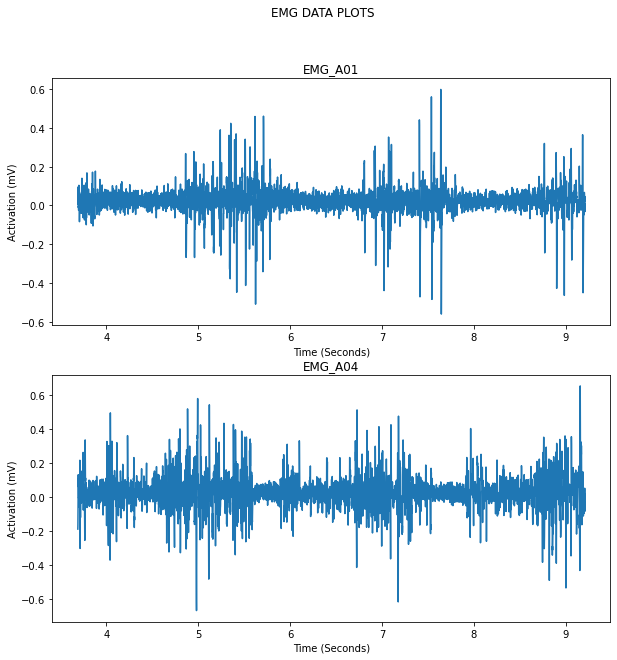

In [90]:
data = pd.read_csv('gaitEMG.txt', delimiter='\t')
print('The first 5 rows of the imported data')
print(data.head())

plt.figure(figsize=(10,10))
plt.suptitle('EMG DATA PLOTS')

plt.subplot(2,1,1)
plt.plot(data['Sample #']/1000, data['EMG_A01'])
plt.title('EMG_A01')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,1,2)
plt.plot(data['Sample #']/1000, data['EMG_A04'])
plt.title('EMG_A04')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

# Processing EMG Data

## 1. Remove mean EMG

Text(0, 0.5, 'Activation (mV)')

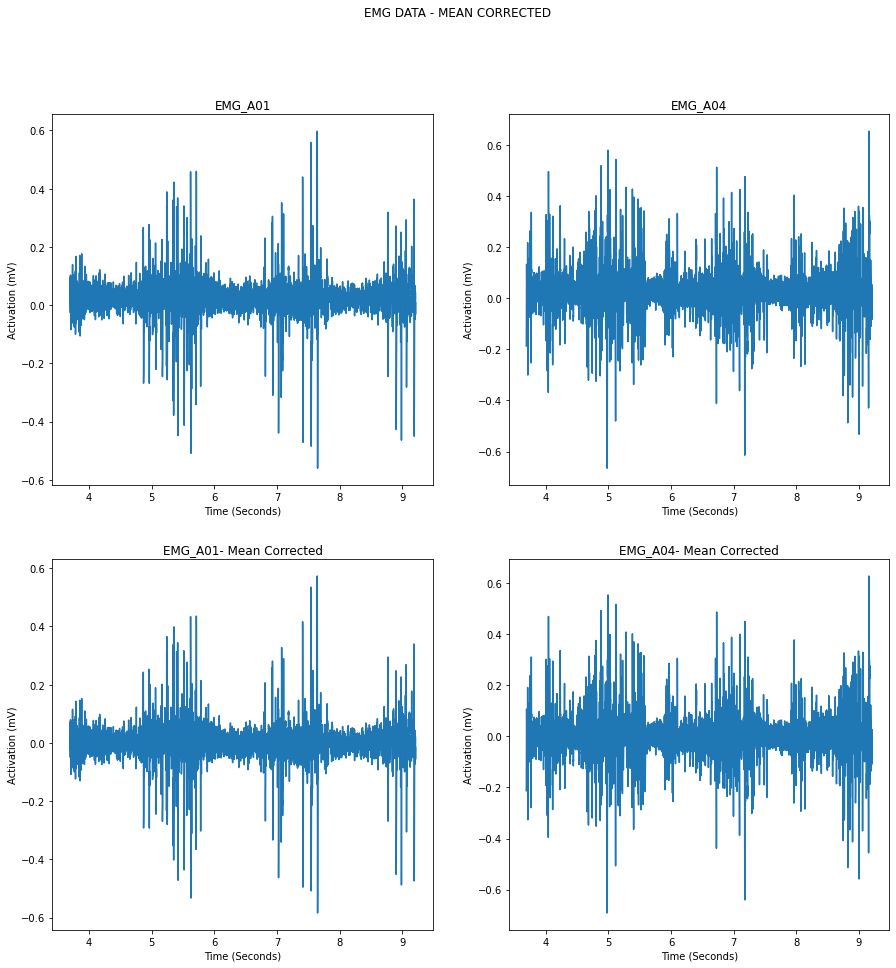

In [94]:
mean_corrected_1 = data['EMG_A01'] - np.mean(data['EMG_A01'])
mean_corrected_2 = data['EMG_A04'] - np.mean(data['EMG_A04'])

plt.figure(figsize=(15,15))
plt.suptitle('EMG DATA - MEAN CORRECTED')

plt.subplot(2,2,1)
plt.plot(data['Sample #']/1000, data['EMG_A01'])
plt.title('EMG_A01')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,2)
plt.plot(data['Sample #']/1000, data['EMG_A04'])
plt.title('EMG_A04')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,3)
plt.plot(data['Sample #']/1000, mean_corrected_1)
plt.title('EMG_A01- Mean Corrected')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,4)
plt.plot(data['Sample #']/1000, mean_corrected_2)
plt.title('EMG_A04- Mean Corrected')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

## 2. Filtering

Text(0, 0.5, 'Activation (mV)')

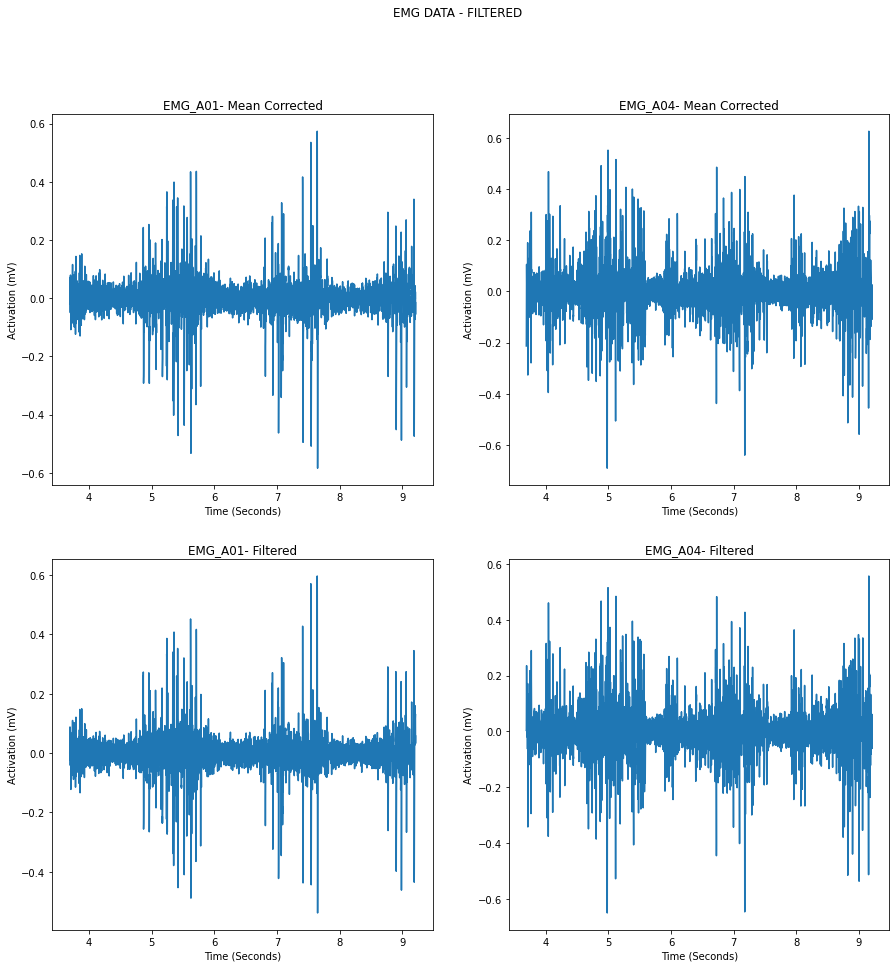

In [96]:
high = 20/(1000/2)
low = 450/(1000/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

filtered_1 = sp.signal.filtfilt(b, a, mean_corrected_1)
filtered_2 = sp.signal.filtfilt(b, a, mean_corrected_2)


plt.figure(figsize=(15,15))
plt.suptitle('EMG DATA - FILTERED')

plt.subplot(2,2,1)
plt.plot(data['Sample #']/1000, mean_corrected_1)
plt.title('EMG_A01- Mean Corrected')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,2)
plt.plot(data['Sample #']/1000, mean_corrected_2)
plt.title('EMG_A04- Mean Corrected')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,3)
plt.plot(data['Sample #']/1000, filtered_1)
plt.title('EMG_A01- Filtered')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,4)
plt.plot(data['Sample #']/1000, filtered_2)
plt.title('EMG_A04- Filtered')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

## 3. Rectification

Text(0, 0.5, 'Activation (mV)')

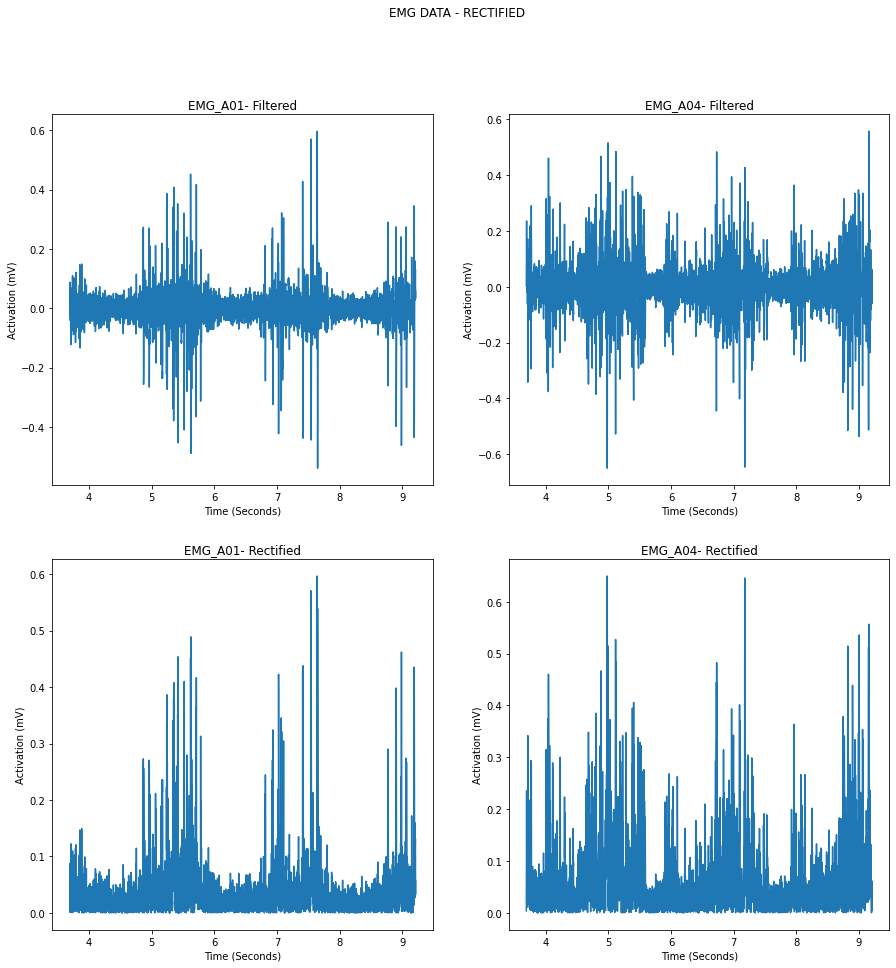

In [97]:
rectified_1 = abs(filtered_1)
rectified_2 = abs(filtered_2)

plt.figure(figsize=(15,15))
plt.suptitle('EMG DATA - RECTIFIED')

plt.subplot(2,2,1)
plt.plot(data['Sample #']/1000, filtered_1)
plt.title('EMG_A01- Filtered')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,2)
plt.plot(data['Sample #']/1000, filtered_2)
plt.title('EMG_A04- Filtered')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,3)
plt.plot(data['Sample #']/1000, rectified_1)
plt.title('EMG_A01- Rectified')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,4)
plt.plot(data['Sample #']/1000, rectified_2)
plt.title('EMG_A04- Rectified')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

# Enveloping

Text(0, 0.5, 'Activation (mV)')

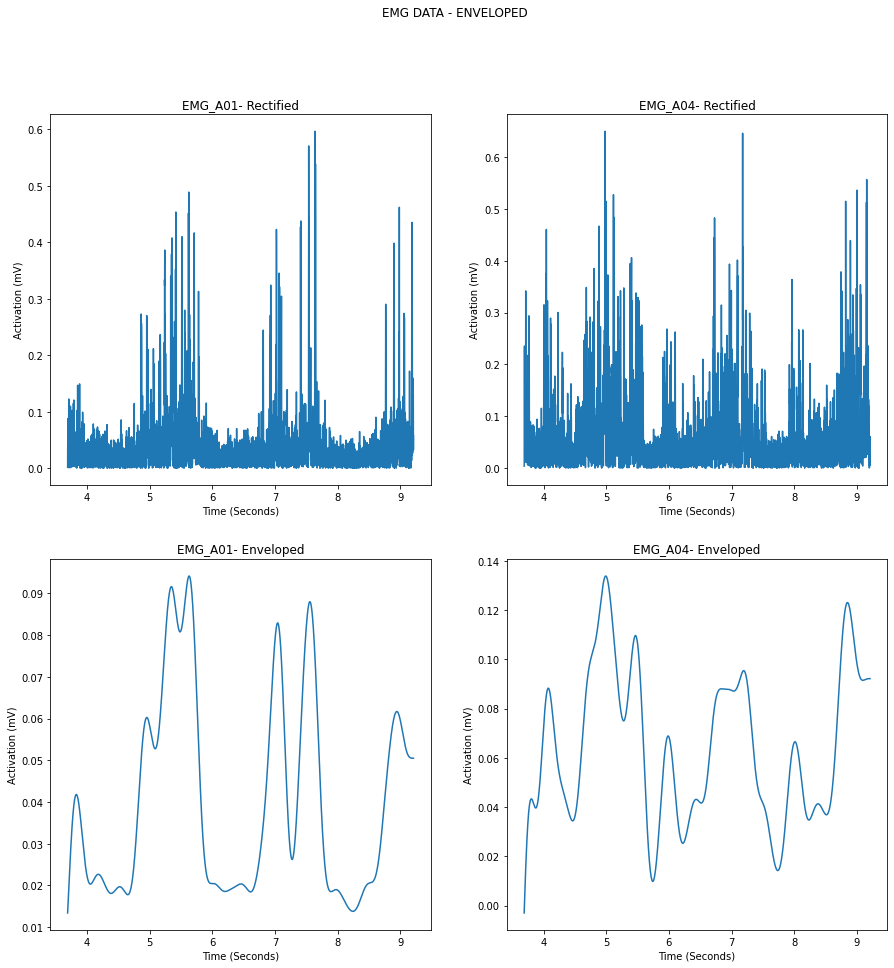

In [99]:
low_pass=3
sfreq=1000
high_band=20
low_band=450

# normalise cut-off frequencies to sampling frequency
high_band = high_band/(sfreq/2)
low_band = low_band/(sfreq/2)

# create lowpass filter and apply to rectified signal to get EMG envelope
low_pass = low_pass/(sfreq/2)
b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')

envelope_1 = sp.signal.filtfilt(b2, a2, rectified_1)
envelope_2 = sp.signal.filtfilt(b2, a2, rectified_2)


plt.figure(figsize=(15,15))
plt.suptitle('EMG DATA - ENVELOPED')

plt.subplot(2,2,1)
plt.plot(data['Sample #']/1000, rectified_1)
plt.title('EMG_A01- Rectified')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,2)
plt.plot(data['Sample #']/1000, rectified_2)
plt.title('EMG_A04- Rectified')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,3)
plt.plot(data['Sample #']/1000, envelope_1)
plt.title('EMG_A01- Enveloped')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,4)
plt.plot(data['Sample #']/1000, envelope_2)
plt.title('EMG_A04- Enveloped')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

# Importing and visualising MVIC data

The first 5 rows of the imported data
   Sample #   EMG_A01   EMG_A04
0         1  0.023346  0.021820
1         2  0.025482  0.038452
2         3  0.026855  0.057678
3         4  0.022278 -0.005646
4         5  0.016937  0.042267


Text(0, 0.5, 'Activation (mV)')

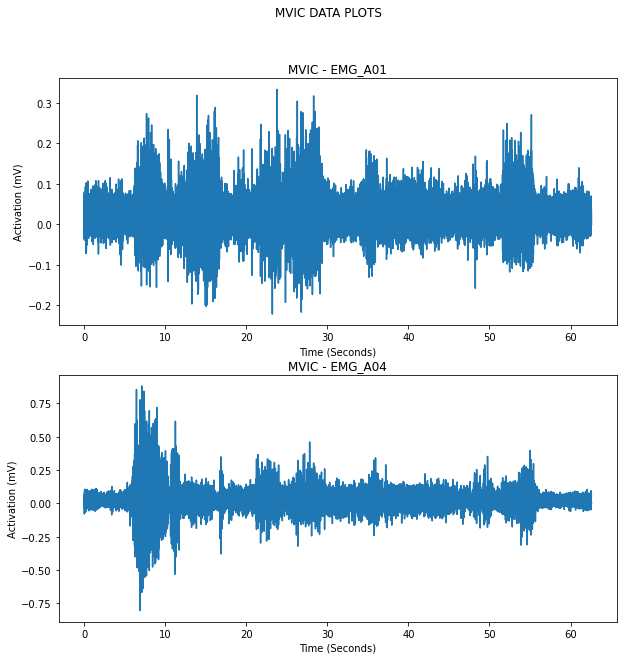

In [101]:
mvic = pd.read_csv('MVIC.txt', delimiter='\t')
print('The first 5 rows of the imported data')
print(mvic.head())

plt.figure(figsize=(10,10))
plt.suptitle('MVIC DATA PLOTS')

plt.subplot(2,1,1)
plt.plot(mvic['Sample #']/1000, mvic['EMG_A01'])
plt.title('MVIC - EMG_A01')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,1,2)
plt.plot(mvic['Sample #']/1000, mvic['EMG_A04'])
plt.title('MVIC - EMG_A04')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

# Processing MVIC data

## 1. Removing mean MVIC

Text(0, 0.5, 'Activation (mV)')

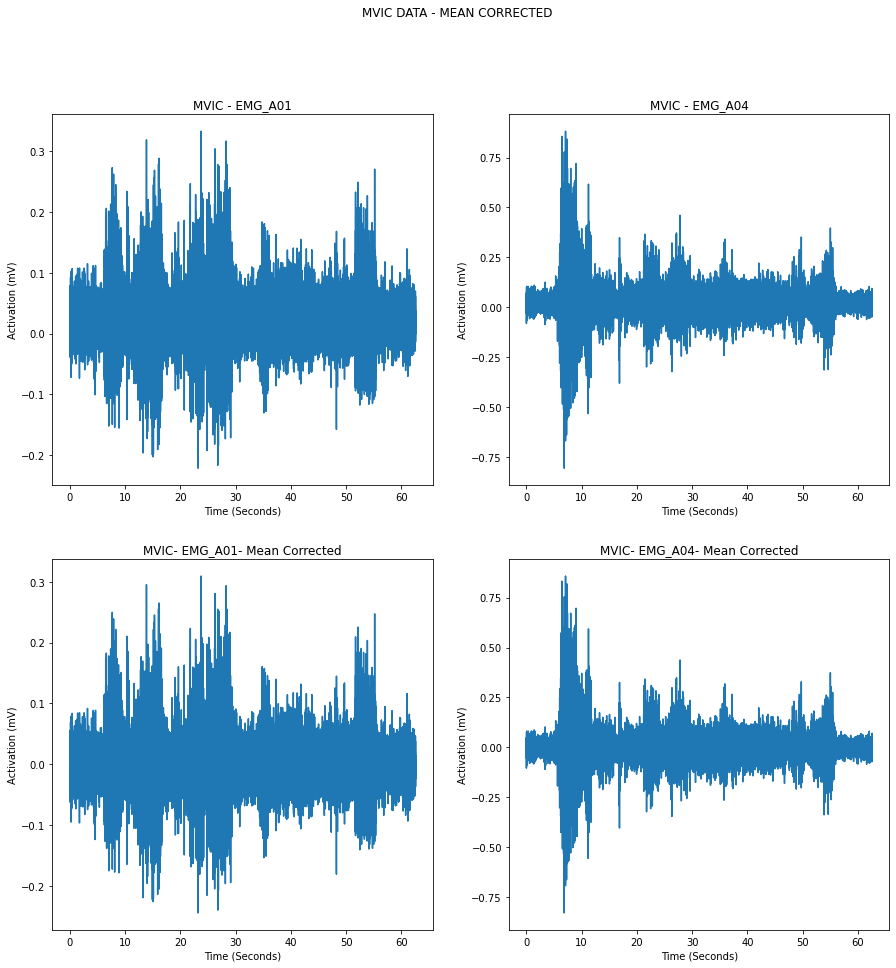

In [102]:
mean_corrected_mvic_1 = mvic['EMG_A01'] - np.mean(mvic['EMG_A01'])
mean_corrected_mvic_2 = mvic['EMG_A04'] - np.mean(mvic['EMG_A04'])

plt.figure(figsize=(15,15))
plt.suptitle('MVIC DATA - MEAN CORRECTED')

plt.subplot(2,2,1)
plt.plot(mvic['Sample #']/1000, mvic['EMG_A01'])
plt.title('MVIC - EMG_A01')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,2)
plt.plot(mvic['Sample #']/1000, mvic['EMG_A04'])
plt.title('MVIC - EMG_A04')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,3)
plt.plot(mvic['Sample #']/1000, mean_corrected_mvic_1)
plt.title('MVIC- EMG_A01- Mean Corrected')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,4)
plt.plot(mvic['Sample #']/1000, mean_corrected_mvic_2)
plt.title('MVIC- EMG_A04- Mean Corrected')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

## 2. Filtering

Text(0, 0.5, 'Activation (mV)')

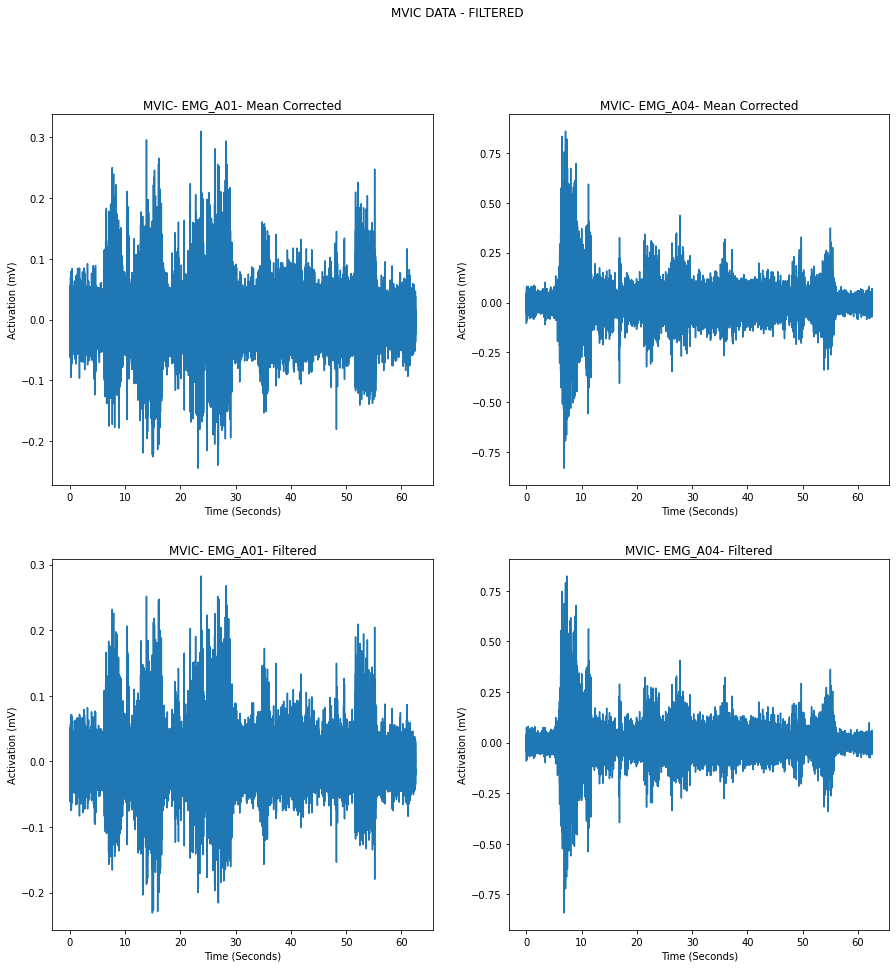

In [103]:
high = 20/(1000/2)
low = 450/(1000/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

filtered_mvic_1 = sp.signal.filtfilt(b, a, mean_corrected_mvic_1)
filtered_mvic_2 = sp.signal.filtfilt(b, a, mean_corrected_mvic_2)


plt.figure(figsize=(15,15))
plt.suptitle('MVIC DATA - FILTERED')

plt.subplot(2,2,1)
plt.plot(mvic['Sample #']/1000, mean_corrected_mvic_1)
plt.title('MVIC- EMG_A01- Mean Corrected')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,2)
plt.plot(mvic['Sample #']/1000, mean_corrected_mvic_2)
plt.title('MVIC- EMG_A04- Mean Corrected')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,3)
plt.plot(mvic['Sample #']/1000, filtered_mvic_1)
plt.title('MVIC- EMG_A01- Filtered')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,4)
plt.plot(mvic['Sample #']/1000, filtered_mvic_2)
plt.title('MVIC- EMG_A04- Filtered')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

## 3. Rectification

Text(0, 0.5, 'Activation (mV)')

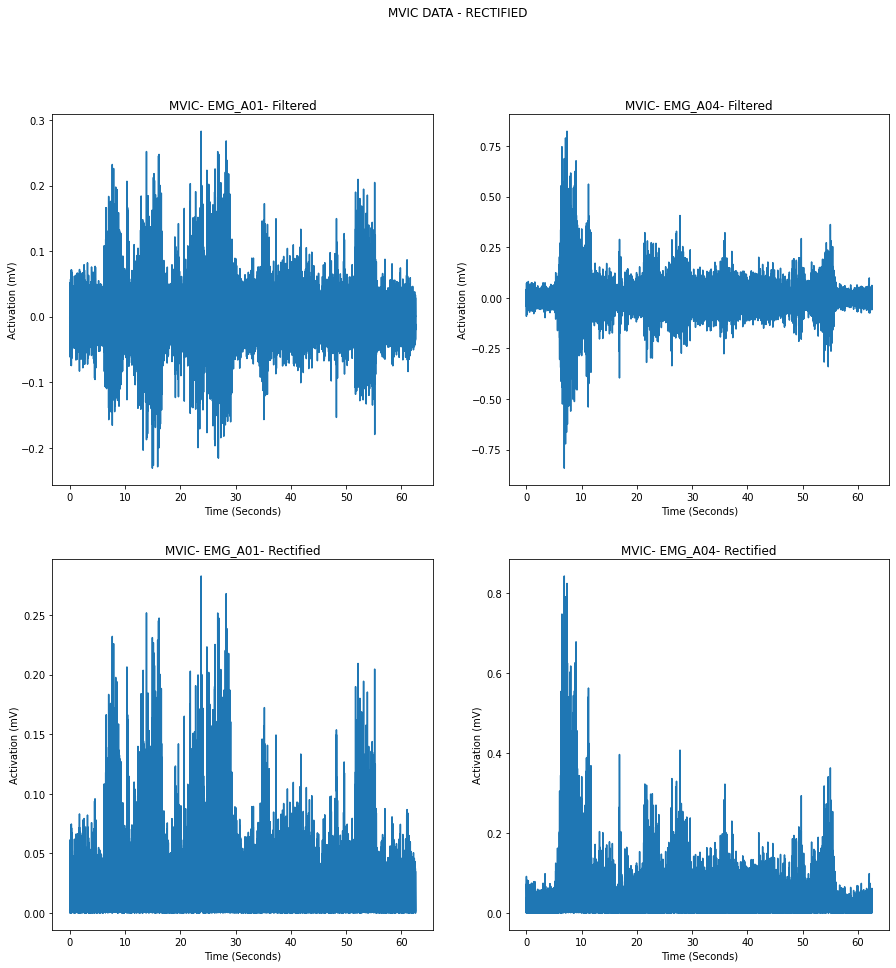

In [104]:
rectified_mvic_1 = abs(filtered_mvic_1)
rectified_mvic_2 = abs(filtered_mvic_2)

plt.figure(figsize=(15,15))
plt.suptitle('MVIC DATA - RECTIFIED')

plt.subplot(2,2,1)
plt.plot(mvic['Sample #']/1000, filtered_mvic_1)
plt.title('MVIC- EMG_A01- Filtered')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,2)
plt.plot(mvic['Sample #']/1000, filtered_mvic_2)
plt.title('MVIC- EMG_A04- Filtered')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,3)
plt.plot(mvic['Sample #']/1000, rectified_mvic_1)
plt.title('MVIC- EMG_A01- Rectified')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,4)
plt.plot(mvic['Sample #']/1000, rectified_mvic_2)
plt.title('MVIC- EMG_A04- Rectified')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

# Enveloping

Text(0, 0.5, 'Activation (mV)')

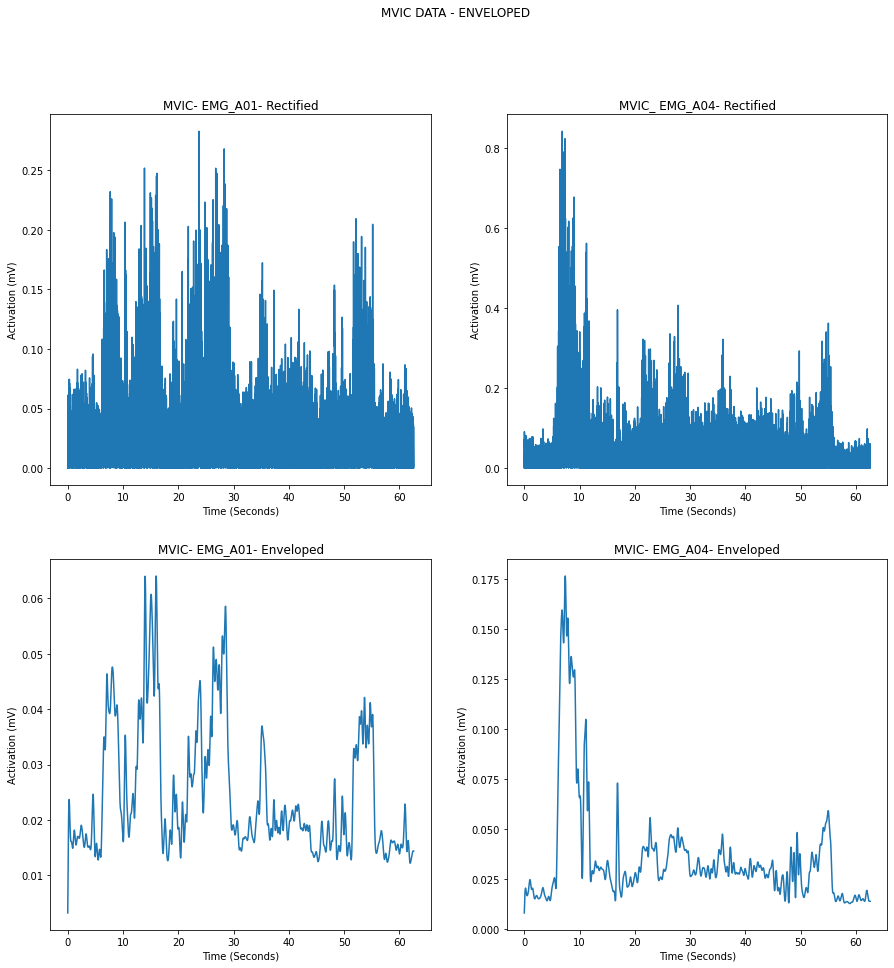

In [109]:
low_pass=2
sfreq=1000
high_band=20
low_band=450

# normalise cut-off frequencies to sampling frequency
high_band = high_band/(sfreq/2)
low_band = low_band/(sfreq/2)

# create lowpass filter and apply to rectified signal to get EMG envelope
low_pass = low_pass/(sfreq/2)
b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')

envelope_mvic_1 = sp.signal.filtfilt(b2, a2, rectified_mvic_1)
envelope_mvic_2 = sp.signal.filtfilt(b2, a2, rectified_mvic_2)


plt.figure(figsize=(15,15))
plt.suptitle('MVIC DATA - ENVELOPED')

plt.subplot(2,2,1)
plt.plot(mvic['Sample #']/1000, rectified_mvic_1)
plt.title('MVIC- EMG_A01- Rectified')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,2)
plt.plot(mvic['Sample #']/1000, rectified_mvic_2)
plt.title('MVIC_ EMG_A04- Rectified')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,3)
plt.plot(mvic['Sample #']/1000, envelope_mvic_1)
plt.title('MVIC- EMG_A01- Enveloped')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

plt.subplot(2,2,4)
plt.plot(mvic['Sample #']/1000, envelope_mvic_2)
plt.title('MVIC- EMG_A04- Enveloped')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')

# Normalising EMG data with %MVIC values

## 1. Find peak MVIC values from enveloped MVIC data

In [128]:
peak_mvic_1 = max(envelope_mvic_1)
peak_mvic_2 = max(envelope_mvic_2)

print(peak_mvic_1)
print(peak_mvic_2)

0.06405733587325708
0.17640839696698973


## 2. Normalised EMG = ( (EMG Envelope) / (peak MVIC) )

In [129]:
normalised_emg_1 = (envelope_1/peak_mvic_1)
normalised_emg_2 = (envelope_2/peak_mvic_2)

## 3. Plotting Normalised EMG

/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


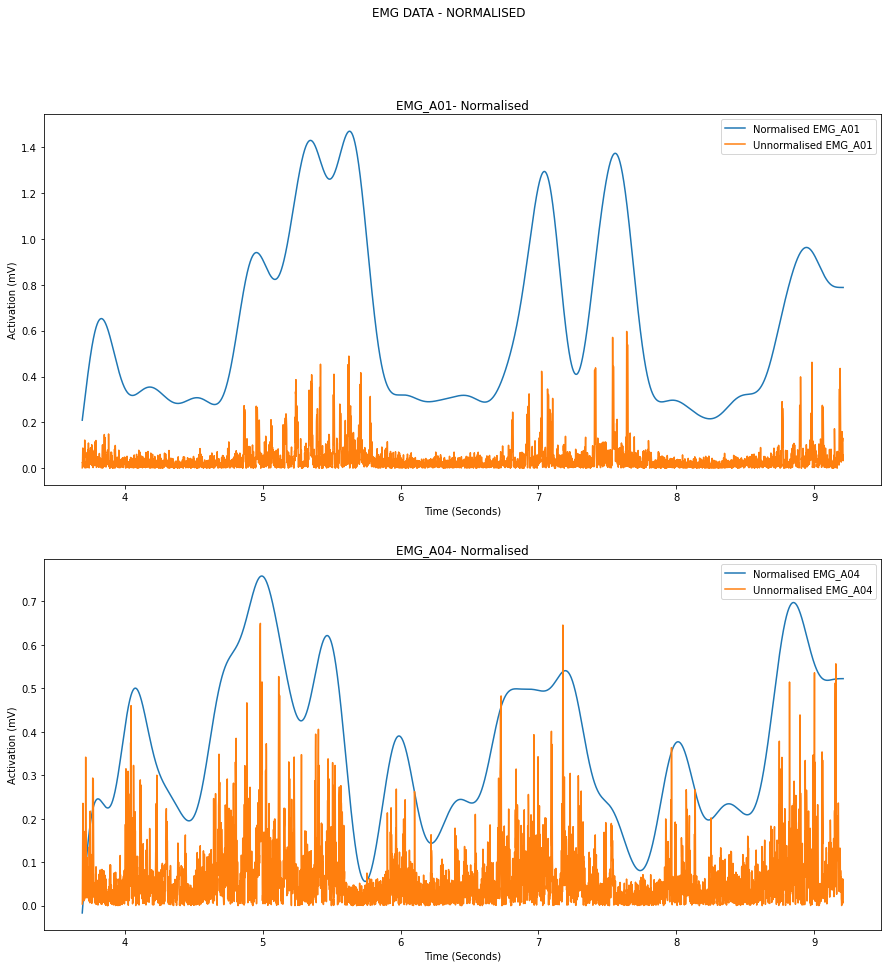

In [131]:
plt.figure(figsize=(15,15))
plt.suptitle('EMG DATA - NORMALISED')

plt.subplot(2,1,1)
plt.plot(data['Sample #']/1000, normalised_emg_1)
plt.title('EMG_A01- Normalised')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')
plt.subplot(2,1,1)
plt.plot(data['Sample #']/1000, rectified_1)
plt.legend(['Normalised EMG_A01', 'Unnormalised EMG_A01'])

plt.subplot(2,1,2)
plt.plot(data['Sample #']/1000, normalised_emg_2)
plt.title('EMG_A04- Normalised')
plt.xlabel('Time (Seconds)')
plt.ylabel('Activation (mV)')
plt.plot(data['Sample #']/1000, rectified_2)
plt.legend(['Normalised EMG_A04', 'Unnormalised EMG_A04'])